# Visualização da Informação

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
DATAFILENAME = "USD_BRL_hist.csv"

In [11]:
df = pd.read_csv(DATAFILENAME)
df.head()

,Data,USD_BRL
0,31.12.2019,4.0195
1,30.12.2019,4.0195
2,27.12.2019,4.0460
3,26.12.2019,4.0560
4,25.12.2019,4.0838


Corrigir tipos de dados

In [12]:
df["Data"] = pd.to_datetime(df["Data"], dayfirst=True)
df.head()

,Data,USD_BRL
0,2019-12-31,4.0195
1,2019-12-30,4.0195
2,2019-12-27,4.0460
3,2019-12-26,4.0560
4,2019-12-25,4.0838


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     2608 non-null   datetime64[ns]
 1   USD_BRL  2608 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 KB


Análise inicial de estatística básica

In [14]:
df["USD_BRL"].describe()

count    2608.000000
mean        2.751703
std         0.839616
min         1.538300
25%         1.985350
50%         2.653100
75%         3.477100
max         4.263800
Name: USD_BRL, dtype: float64

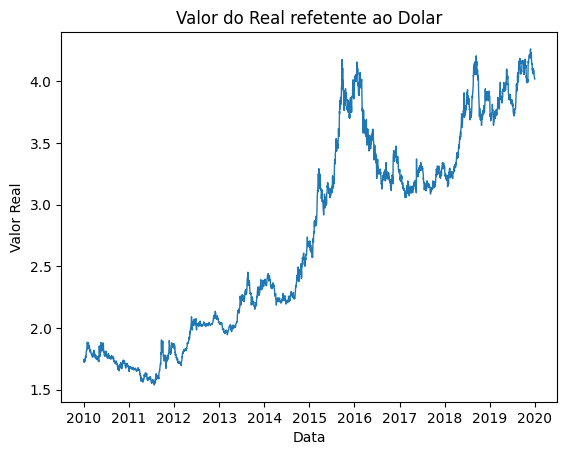

In [46]:
x = df["Data"].values
y = df["USD_BRL"].values

fig, ax = plt.subplots()

ax.set_title("Valor do Real refetente ao Dolar")
ax.set_xlabel("Data")
ax.set_ylabel("Valor Real")

ax.plot(x, y)

plt.show()